In [3]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def estimate_coef(x, y):
    xmean = np.mean(x)
    ymean = np.mean(y)
    
    xycov = ((x-xmean)*(y-ymean)).sum()
    xvar = ((x-xmean)**2).sum()
    
    a = xycov/xvar
    b = ymean - a*xmean
    
    return a,b

In [4]:
def plot_lines(x, y, coef):
    plt.figure(figsize=(7,7))
    plt.scatter(x, y, c='g')
    
    a,b=coef
    y_pred=a*x + b
    plt.plot(x, y_pred, c='r')

In [5]:
np.random.seed(42)
N = 150
X = 6 * np.random.randn(N) - 3
y = 2*X + np.random.randn(N)*2

In [6]:
coef = estimate_coef(X, y)
coef

(1.9913880557491253, 0.1123696988858871)

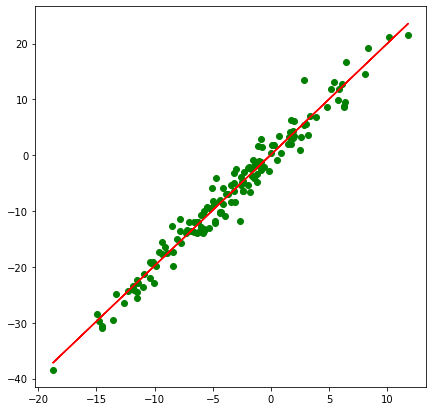

In [7]:
plot_lines(X, y, coef)

In [8]:
from scipy.stats import pearsonr
pearsonr(X, y)

(0.9839362905869267, 1.182107252362632e-112)

### Użycie biblioteki sklearn

In [9]:
from sklearn.linear_model import LinearRegression

In [11]:
X.shape

(150,)

In [12]:
model = LinearRegression()
model.fit(X.reshape(-1,1) , y)

LinearRegression()

In [13]:
model.coef_, model.intercept_

(array([1.99138806]), 0.1123696988858871)

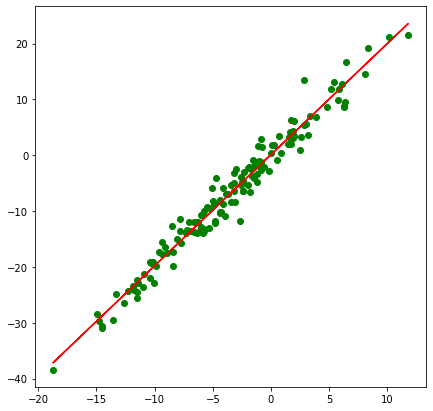

In [14]:
plot_lines(X, y, (model.coef_[0], model.intercept_) )

In [15]:
# metryki dla regresji
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [16]:
# obliczenie danych predykcyjnych
y_pred = model.predict(X.reshape(-1,1))

In [17]:
mean_absolute_error(y, y_pred)

1.6007665768345867

In [20]:
mean_squared_error(y, y_pred)

4.145397778686192

In [21]:
r2_score(y, y_pred)

0.9681306239339611

### Efekt lejka

In [22]:
import pandas as pd

In [24]:
df = pd.read_csv("http://51.91.120.89/extras/advertising.csv", usecols=["TV","sales"])
df

,TV,sales
0,230.1,22.1
1,44.5,10.4
2,17.2,9.3
3,151.5,18.5
4,180.8,12.9
...,...,...
195,38.2,7.6
196,94.2,9.7
197,177.0,12.8
198,283.6,25.5


In [27]:
X = df.TV.values.reshape(-1,1)
y = df.sales

In [28]:
model = LinearRegression()
model.fit(X, y)

LinearRegression()

In [29]:
model.coef_, model.intercept_

(array([0.04753664]), 7.0325935491276965)

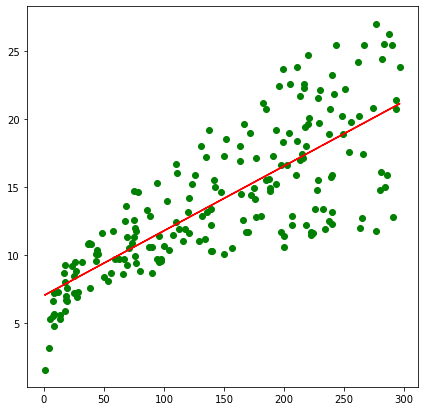

In [30]:
plot_lines(X, y, (model.coef_[0], model.intercept_) )

In [31]:
y_pred = model.predict(X)

In [32]:
r2_score(y, y_pred)

0.611875050850071

In [34]:
df1 = df.query(" TV>=20 and TV<=50 ")
df1

,TV,sales
1,44.5,10.4
12,23.8,9.2
38,43.1,10.1
44,25.1,8.5
66,31.5,9.5
72,26.8,8.8
76,27.5,6.9
91,28.6,7.3
106,25.0,7.2
134,36.9,10.8


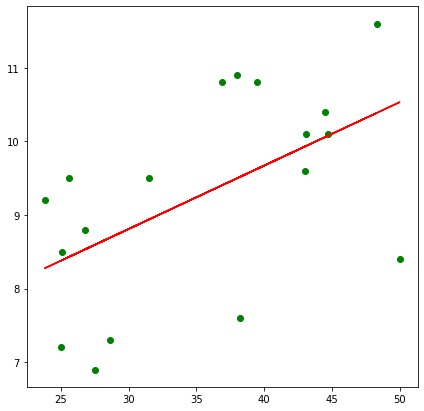

In [35]:
X = df1.TV.values.reshape(-1,1)
y = df1.sales

model = LinearRegression()
model.fit(X, y)

plot_lines(X, y, (model.coef_[0], model.intercept_) )

In [36]:
r2_score(y, model.predict(X) )

0.2949131993229921

In [37]:
df1.corr()

,TV,sales
TV,1.000000,0.543059
sales,0.543059,1.000000


In [38]:
df.corr()

,TV,sales
TV,1.000000,0.782224
sales,0.782224,1.000000
